In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt  # Importing matplotlib
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [45]:
# Define the file path where the model is saved
model_path = r"C:\Users\joshd\OneDrive\Documents\PBL\Cat Breeds Folder\cat_classification.h5"
# Load the saved model
loaded_model = load_model(model_path)

In [46]:
# Define a function to preprocess the test image
def preprocess_image(image_path):
    # Load the image from the file path and resize it to match the model's input size
    img = keras_image.load_img(image_path, target_size=(256, 256))
    # Convert the image to a numpy array
    img_array = keras_image.img_to_array(img)
    # Expand the dimensions to match the model's input shape
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image for the model
    preprocessed_img = preprocess_input(img_array)
    return preprocessed_img

In [47]:
# Define a function to display the test image and its predicted class
def display_image_with_prediction(image_path, model):
    # Preprocess the test image
    preprocessed_test_image = preprocess_image(image_path)
    # Predict the class probabilities
    predictions = model.predict(preprocessed_test_image)
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])
    # Define a dictionary mapping class indices to class labels
    class_labels = {0: 'Bengal',1: 'Bombay',2: 'Persian',3: 'Siamese'}
    # Get the predicted class label
    predicted_class = class_labels[predicted_class_index]
    # Load the image using Matplotlib
    img = keras_image.load_img(image_path)
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

In [48]:
# Define a function to get a set of random images from a directory
def get_random_images(directory, num_images):
    # Get a list of all image file names in the directory
    image_files = os.listdir(directory)
    # Choose random images from the list
    random_images = np.random.choice(image_files, num_images)
    return random_images# Define the directory containing the random images
random_images_directory = r"C:\Users\joshd\OneDrive\Documents\PBL\Random cat images"

# Get random images from the directory
num_random_images = 5
random_images = get_random_images(random_images_directory, num_random_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


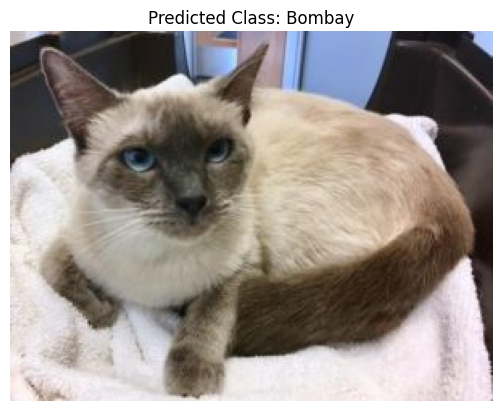

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


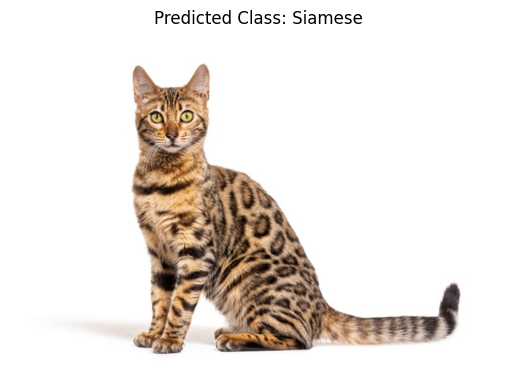

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


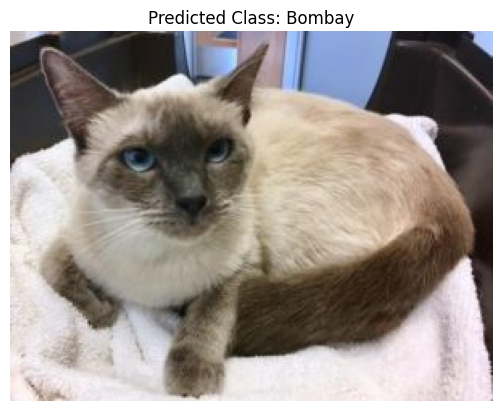

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


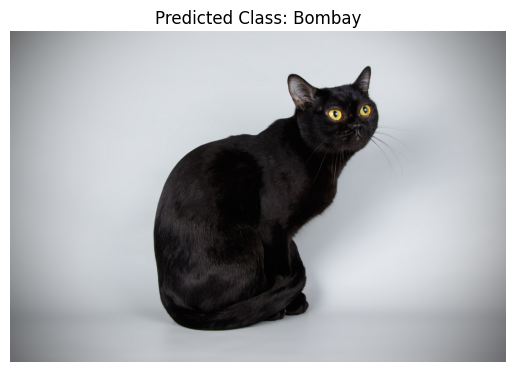

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


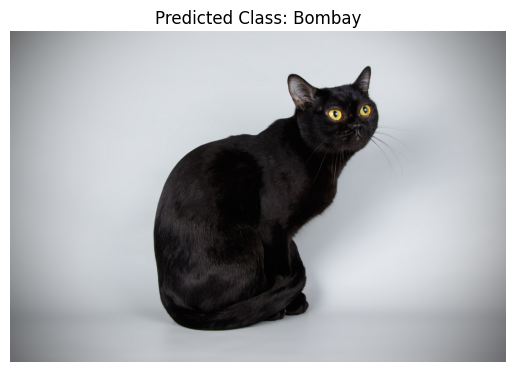

In [49]:
# Display the random images with their predicted classes
for image_name in random_images:
    # Construct the full path to the random image
    random_image_path = os.path.join(random_images_directory, image_name)
    # Display the random image with its predicted class
    display_image_with_prediction(random_image_path, loaded_model)